# M200b mass function on our clustered data 

each of the particle has a constant mass of 2.75491975e+43 g 

In [1]:
%pylab inline
import yt

Populating the interactive namespace from numpy and matplotlib


In [2]:
centers  = np.loadtxt("../10MMBK/centers40000.txt")
labels  = np.loadtxt("../10MMBK/labels40000.txt")
density  = np.loadtxt("../10MMBK/density40000.txt")

In [3]:
print shape(centers)
print shape(labels)
print shape(density)

(40000, 3)
(2097152,)
(40000,)


In [4]:
yt.funcs.mylog.setLevel(50)

In [5]:
ds = yt.load("../../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
grid= ds.covering_grid(1,[0,0.0,0.0],dims=[32,32,32])
pcl_dens =  grid[('deposit','all_cic')]

In [6]:
mass = ad[('all', 'mass')]
particle_mass = ad[('all', 'particle_mass')]

In [7]:
print mass == particle_mass
print particle_mass

[ True  True  True ...,  True  True  True]
[  2.75491975e+43   2.75491975e+43   2.75491975e+43 ...,   2.75491975e+43
   2.75491975e+43   2.75491975e+43] g


In [60]:
np.unique(particle_mass)

YTArray([  2.75491975e+43]) g

In [8]:
# ds.field_info

In [9]:
M_sol = 1.9891e33 #grams
h = 0.6774 #reduced hubble constant
m = 2.75491975e+43 /M_sol*h 
print "mass per particle : ", m,"Msun/h"

mass per particle :  9382045340.35 Msun/h


In [157]:
m

9382045340.354933

In [159]:
halo_catalog[:,4]/m

array([ 1004944.70213713,   852511.00904373,   764911.34711661, ...,
         106590.40579335,   106590.40579335,   106590.40579335])

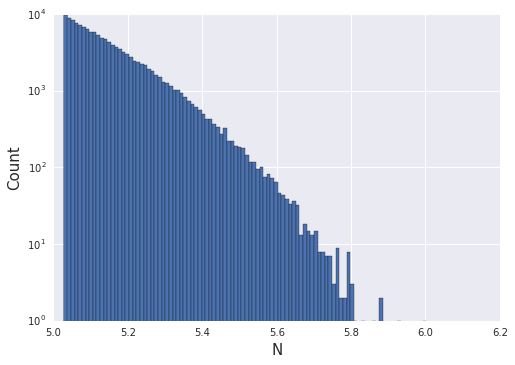

In [167]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)
N= halo_catalog[:,4]/m #number of particle per halo = m200b/mass per particle
n_1, bins, patches  = plt.hist(log10(N),100,log=True)#,histtype='step',color="red")#, normed=True)
# ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel("N",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

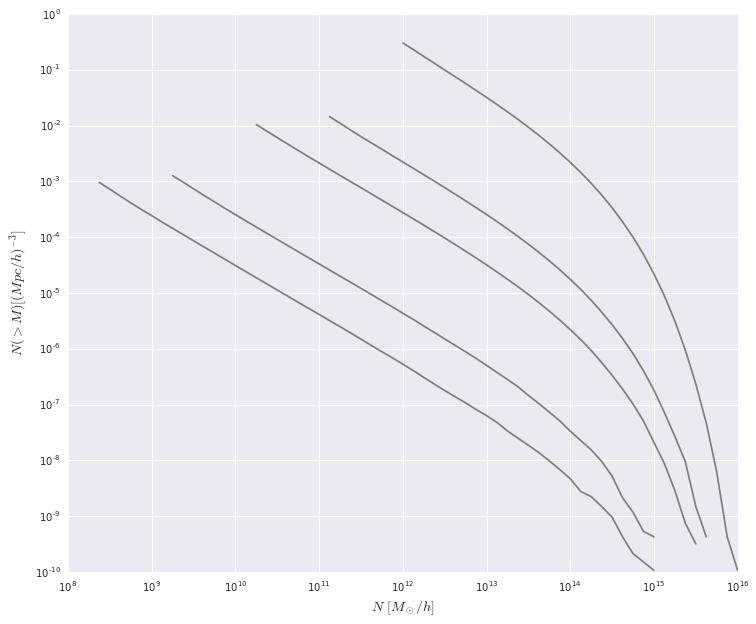

In [172]:
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]
    mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
    if n.sum() > 0:
        ngtm = np.cumsum(n[mask][::-1])[::-1]
        N = ngtm/m #/vol**3
        xx.loglog(bin_center_mass[mask], N ,ms=4, mec='None', color="gray")#,label="ds14_histo8* data")#, label=tag)
    i += 1

# xx.set_title('DS14 Mass Function')
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$N\  [M_\odot/h]$', fontdict={'fontsize':14})
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14})
leg = xx.legend(loc="lower left",labelspacing=.5)
# for t in leg.get_texts():
#     t.set_fontsize('small')    # the legend text fontsize
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.show()

Ideal number of particle in previous 2M dataset shown to be ~50

Trying to find what is the distribution of particle number per cluster to better estimate k 

why is there a sharp cutoff at 10^5? 

Order of magnitude about right 10^10 Msun/h 

http://wwwmpa.mpa-garching.mpg.de/galform/virgo/vls/

$$M_{halo} = N*m $$

In [10]:
idx_list = []
N_list = []
for i in np.arange(40000): 
    idx = np.where(labels==i)[0]
    idx_list.append(idx)
    N_list.append(len(idx))

In [11]:
# print idx_list
# print N_list

In [22]:
idx = np.array(idx_list)
N = np.array(N_list)

Actually I think the mass function just plots the number density so I dont think this is even necessary 

In [13]:
# plt.hist(M_halo)
# n, bins, patches  = plt.hist(np.log10(M_halo),log=True,histtype='step')#, normed=True)
# plt.xlabel("log10(m200b)",fontsize = 15)
# plt.ylabel("Count",fontsize = 15)

Actually since this is a smaller subset of the whole simulation, the volume is probably different . According to [scivis website](http://darksky.slac.stanford.edu/scivis2015/data/), this is an 128^3 particle dataset

In [139]:
V = 128.**3
# V = 10240.**3
# n = N/V
# m200_b = n*m
m200_b = N*m

In [144]:
m200_b

array([  9.66350670e+11,   1.68876816e+11,   6.00450902e+11, ...,
         5.53540675e+11,   1.30410430e+12,   2.02652179e+12])

In [140]:
shape(n)
shape(m200_b)

(40000,)

In [141]:
# gamma=9.47e-27 #kg/m
# np.where(n>gamma)

M200b is the mass of the cluster when cluster radius defined as anything above 200*$\rho_{critical}$, here  we ignored this definiiton 

In [151]:
bins_2[:-1]

array([ 10.57435752,  10.79160322,  11.00884891,  11.22609461,
        11.44334031,  11.66058601,  11.8778317 ,  12.0950774 ,
        12.3123231 ,  12.5295688 ])

In [150]:
ngtm_2

array([ 40000.,  39957.,  39447.,  35843.,  25490.,  14273.,   6454.,
         2267.,    648.,    131.])

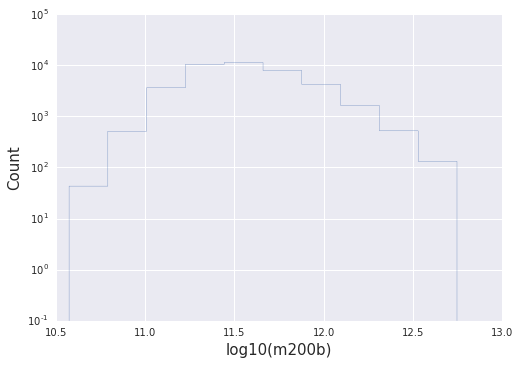

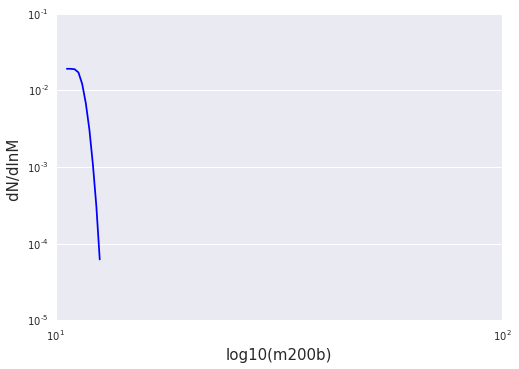

In [149]:
n_2, bins_2, patches  = plt.hist(np.log10(m200_b),log=True,histtype='step')#, normed=True)
plt.xlabel("log10(m200b)",fontsize = 15)
plt.ylabel("Count",fontsize = 15)
# plt.semilogy(bins[:-1],n_2,'s')
plt.figure()
plt.xlabel("log10(m200b)",fontsize = 15)
plt.ylabel("dN/dlnM ",fontsize = 15)
ngtm_2 = np.cumsum(n_2[::-1])[::-1]
plt.loglog(bins_2[:-1], ngtm_2/V,label="Halo_catalog",ms=4, mec='None',color="blue")

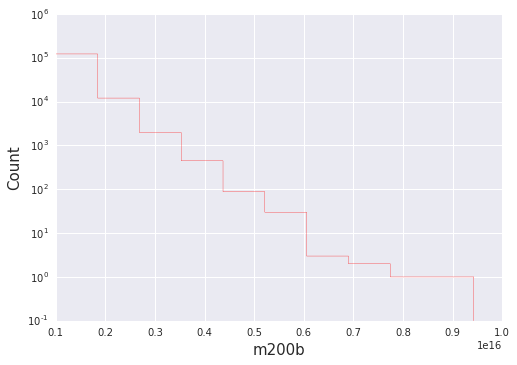

In [120]:
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)
m200b= halo_catalog[:,4]
n_1, bins, patches  = plt.hist(m200b,log=True,histtype='step',color="red")#, normed=True)
plt.xlabel("m200b",fontsize = 15)
plt.ylabel("Count",fontsize = 15)

In [121]:
import seaborn

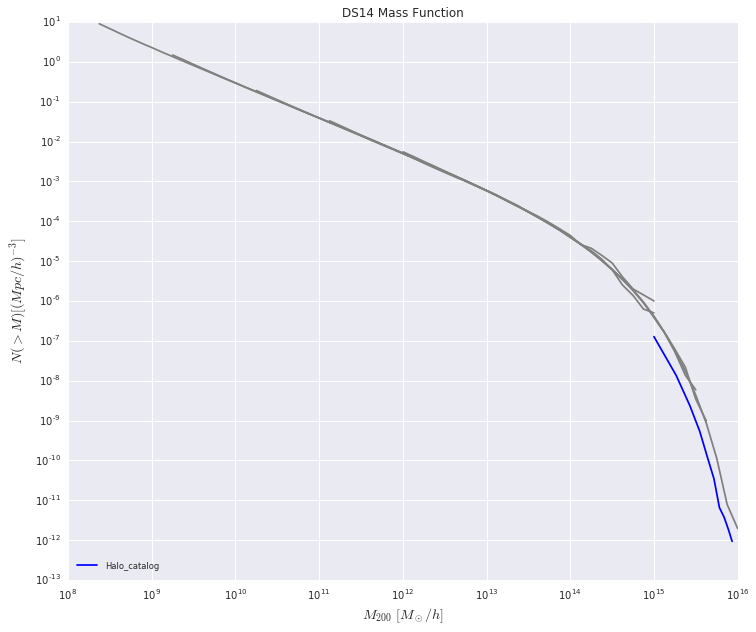

In [122]:
V = 10240.**3
i=0
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]
    mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
    if n.sum() > 0:
        ngtm = np.cumsum(n[mask][::-1])[::-1]
        xx.loglog(bin_center_mass[mask], ngtm/vol**3,ms=4, mec='None', color="gray")#,label="ds14_histo8* data")#, label=tag)
    i += 1

ngtm = np.cumsum(n_1[::-1])[::-1]
xx.loglog(bins[:-1], ngtm/V,label="Halo_catalog",ms=4, mec='None',color="blue")
# ngtm2 = np.cumsum(n_2[::-1])[::-1]
# xx.loglog(bins[:-1], ngtm2/V,label="Clustered results",ms=4, mec='None',color="blue")

xx.set_title('DS14 Mass Function')
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14})
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14})
leg = xx.legend(loc="lower left",labelspacing=.5)
for t in leg.get_texts():
    t.set_fontsize('small')    # the legend text fontsize
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.show()

In [43]:
# num, bins, patches  = plt.hist(np.log10(n),log=True,histtype='step')#, normed=True)
# plt.xlabel("log10(m200b)",fontsize = 15)
# plt.ylabel("Count",fontsize = 15)

Can not really compare this with the Dark Sky Mass function in Fig2 of Skillman et al paper because we might be seeing the effects of limited resolution. Some of these halo mass function do have a peak at the [low mass end](https://www.google.com/search?q=halo+mass+function&tbm=isch&imgil=qo83KjQpTHPk_M%253A%253BSSjNDi_9EIa6XM%253Bhttps%25253A%25252F%25252Finspirehep.net%25252Frecord%25252F929862%25252Fplots&source=iu&pf=m&fir=qo83KjQpTHPk_M%253A%252CSSjNDi_9EIa6XM%252C_&biw=1164&bih=620&usg=__F5cbY92j4rkSoLio8VI0ZoUxnLs%3D&ved=0ahUKEwi9iNWtsszJAhUL5GMKHRUiCIoQyjcILw&ei=T95mVv2kMYvIjwOVxKDQCA#imgrc=_&usg=__F5cbY92j4rkSoLio8VI0ZoUxnLs%3D)

In [ ]:
# plt.hist(n[:100])

In [ ]:
# plt.hist(n)

Comparing this result wiht 11_29_2015 notebook 

In [18]:
# plt.semilogy(bins[:-1],n/V,'s')
# plt.xlabel("log10(m200b)",fontsize = 15)
# plt.ylabel("dN/dlnM ",fontsize = 15)

# Rotational Velocity Curves 

"abandon the ambigu- ous definition for the edge of a halo and rather focus on a property that uniquely specifies the halo for the code comparison project: the peak of the rotation curve as characterised by vmax and the ra- dial location of this peak Rmax, respectively."---- Knebe et al 2011

In [44]:
halo50_ids = np.where(labels==50)[0] # all the particles that belong to halo50 

In [91]:
# ds.field_info

In [96]:
rv = ad[("dark_matter","particle_radial_velocity")]
rv2 = ad[("all",'particle_cylindrical_velocity_theta')]
rv3 = ad[("all","particle_radial_velocity")]
rv4 = ad[("all",'particle_spherical_velocity_phi')]
rv5 = ad[("all",'particle_spherical_velocity_theta')]
rv6 = ad[("all","particle_velocity")]
rv7 = ad[("all",'particle_velocity_magnitude')]
r = ad[("dark_matter","particle_position_cylindrical_radius")] #cm
r2 = ad[("dark_matter","particle_radius")]#cm
#Basically same as above
# r2_all = ad[("all","particle_radius")]#cm
r3 = ad[("dark_matter",'particle_spherical_velocity_radius')]#cm/s
r4 = ad[('particle_velocity_cylindrical_radius')]#cm/s
r5 = ad[('particle_velocity_spherical_radius')]#cm/s

In [94]:
r2==r2_all

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

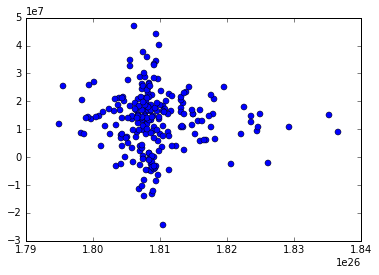

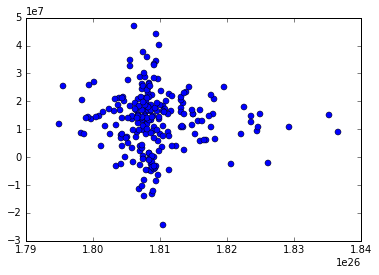

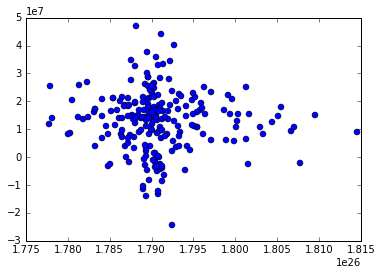

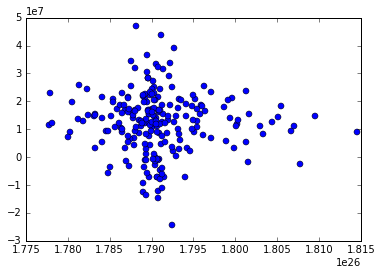

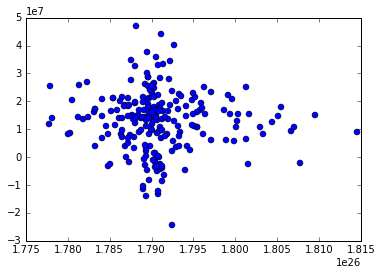

In [97]:
plt.plot(r2_all[halo50_ids],rv[halo50_ids],'o')
plt.figure()
plt.plot(r2[halo50_ids],rv[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],r3[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],r4[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],r5[halo50_ids],'o')

In [101]:
r

YTArray([  1.95451185e+26,   1.94906627e+26,   1.90117077e+26, ...,
         1.88899607e+26,   1.89976873e+26,   1.94570918e+26]) cm

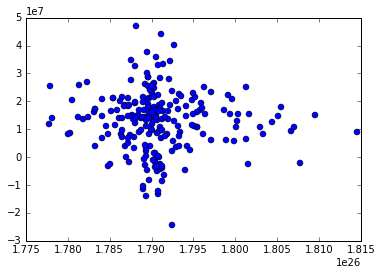

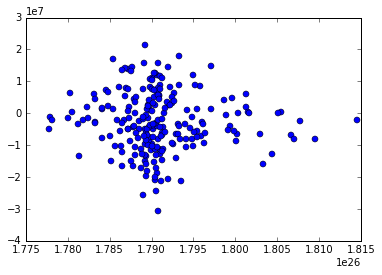

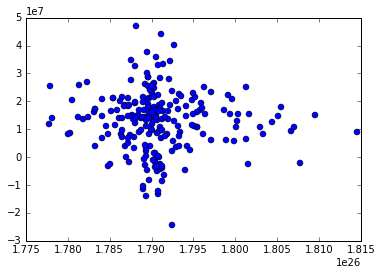

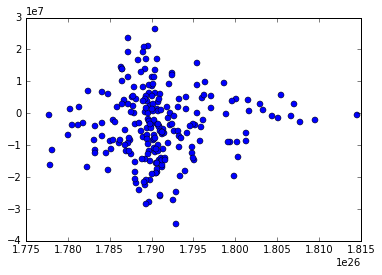

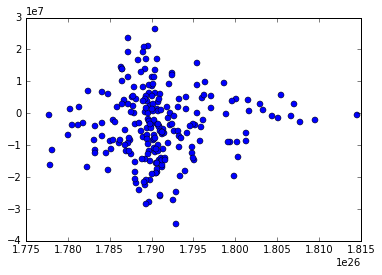

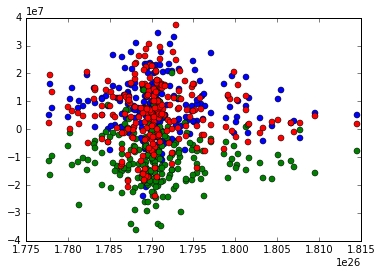

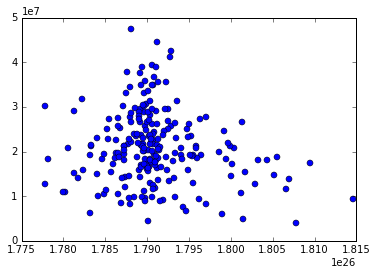

In [99]:
plt.figure()
plt.plot(r[halo50_ids],rv[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],rv2[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],rv3[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],rv4[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],rv5[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],rv6[halo50_ids],'o')
plt.figure()
plt.plot(r[halo50_ids],rv7[halo50_ids],'o')

1e7 cm/s --> 100km/s which approx agrees with characteristic velocities typically galaxy rotation curve 

VMax at around 1.790e26cm -->Rmax =58 Mpcs

But this should be in the kpc OOM

http://inspirehep.net/record/955145/files/fig_NGC3198_mod2.png